# Bibliotheek

Installeer OpenCV:

    https://pypi.org/project/opencv-python/
    
Plotten van foto's: 

    https://matplotlib.org/stable/tutorials/introductory/images.html
    
Installeer scikit-image: 
    
    https://scikit-image.org/docs/stable/install.html
    
scikit-images voorbeelden:

    https://scikit-image.org/docs/stable/auto_examples/index.html

In [2]:
import skimage
import cv2

import matplotlib.pyplot as plt
import numpy as np

# Video opname voorbeeld

Klik op `escape` om de opname te stoppen.

# Foto voorbeeld

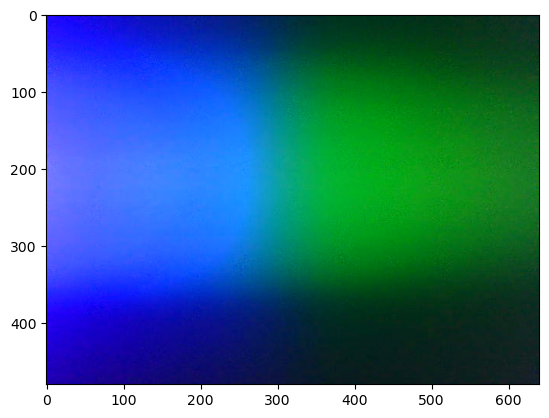

In [265]:
camera = cv2.VideoCapture(1) # Maak verbinding met int : camera id

retval, frame = camera.read() # lees de camera uit

plt.imshow(frame) # geef het uitgelezen frame weer

camera.release() # verbreek de verbinding met de camera

In [313]:
import cv2
import numpy as np

# Stap 1: Lees de afbeelding van de camera
camera = cv2.VideoCapture(1)
retval, frame = camera.read()
camera.release()  # Zorg ervoor dat de camera wordt gesloten

if retval:
    # Stap 2: Zet de afbeelding om naar een NumPy-array
    # frame is al een NumPy-array als je met OpenCV werkt, dus dit is al klaar.
    
    # Stap 3: Sla de afbeelding op met np.save()
    np.save('Oplossing x_3.npy', frame)  # De afbeelding wordt opgeslagen als een NumPy-bestand
    print("Afbeelding opgeslagen als 'Oplossing x_3.npy'")
else:
    print("Kon geen afbeelding van de camera lezen.")




Afbeelding opgeslagen als 'Oplossing x_3.npy'


RGB ndarray shape:  (480, 640, 3)
Grayscale ndarray shape:  (480, 640)
De intensiteit bij pixel 50 is: 125.70829803921568


C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_5836\1806859782.py:30: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 1)


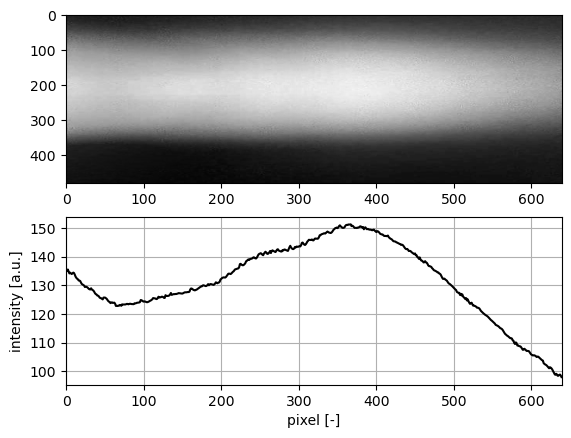

In [38]:
# Stap 4: Laad de afbeelding opnieuw
frame = np.load('Oplossing x_3.npy')

# Toon de afbeelding
cv2.imshow('Opgeslagen afbeelding', frame)
cv2.waitKey(0)
cv2.destroyAllWindows()  # Sluit het afbeeldingsvenster

grayscale = skimage.color.rgb2gray(frame) # RGB -> grayscale

plt.imshow(grayscale, cmap=plt.cm.gray) # De colormap (cmap) is
#puur ter visuele weergave

print("RGB ndarray shape: ", frame.shape) # 3 kanaals
print("Grayscale ndarray shape: ", grayscale.shape) # 1 kanaals


import matplotlib.pyplot as plt
import numpy as np

# Assuming `grayscale` is your image data (2D numpy array)
I = grayscale.sum(axis=0)  # row wise summation

# Get the intensity value at pixel 50
pixel_50_intensity = grayscale[:, 50].sum()  # summing the intensities for column 50

# Print the result
print(f"De intensiteit bij pixel 50 is: {pixel_50_intensity}")

plt.subplot(2, 1, 1)
plt.imshow(grayscale, cmap=plt.cm.gray, aspect="auto")
xmin, xmax = plt.xlim()  # grab min max values from imshow

plt.subplot(2, 1, 2)
plt.plot(I, c='black')

plt.xlim(xmin, xmax)  # set min max values

plt.grid()
plt.xlabel(r"pixel [-]")
plt.ylabel(r"intensity [a.u.]")
plt.show()


# Camera instellingen

# Voorbeeld beeld analyse

RGB -> Grayscale: 

https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_rgb_to_gray.html#sphx-glr-auto-examples-color-exposure-plot-rgb-to-gray-py

Matplotlib colormaps:

https://matplotlib.org/stable/tutorials/colors/colormaps.html

## RGB -> Zwart wit
We hebben slechts interesse in de (relatieve) intensiteit van pixels. Wegens deze reden zetten we het beeld van kleur om naar zwart wit.

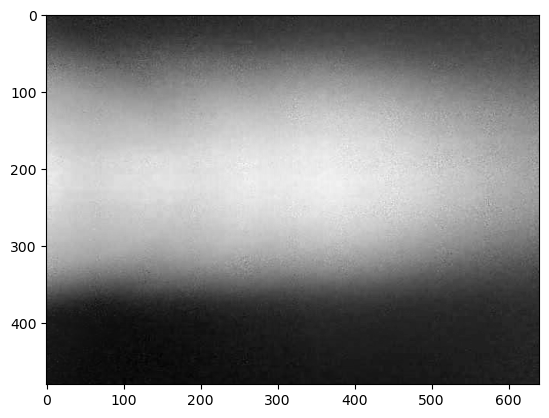

In [19]:
grayscale = skimage.color.rgb2gray(frame) # RGB -> grayscale

plt.imshow(grayscale, cmap=plt.cm.gray) # De colormap (cmap) is
#puur ter visuele weergave

In [20]:
print("RGB ndarray shape: ", frame.shape) # 3 kanaals
print("Grayscale ndarray shape: ", grayscale.shape) # 1 kanaals

RGB ndarray shape:  (480, 640, 3)
Grayscale ndarray shape:  (480, 640)


## Intensiteit per pixel kolom
We kunnen alle waarden van één kolom sommeren om de z.g. intensiteit van de betreffende kolom te bepalen. Deze intensiteit heeft (nog) geen eenheid, daarom noemen we dit `arbitrary units` (a.u.). 

Wanneer het lichtspectrum over de CMOS verspreid is zou je onderstaande code kunnen gebruiken om (bijna) direct een spectrogram te krijgen. Het pixel nummer is namenlijk te koppelen aan spatiële informatie en daarmee aan de frequentie van het licht.

Text(0, 0.5, 'intensity [a.u.]')

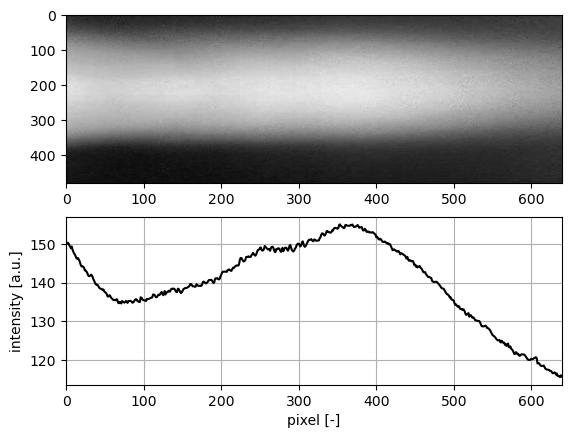

In [8]:
I = grayscale.sum(axis=0) # row wise summation


plt.subplot(2,1,1)
plt.imshow(grayscale, cmap=plt.cm.gray, aspect="auto")
xmin, xmax = plt.xlim() # grab min max values from imshow

plt.subplot(2,1,2)
plt.plot(I, c='black')

plt.xlim(xmin,xmax) # set min max values

plt.grid()
plt.xlabel(r"pixel [-]")
plt.ylabel(r"intensity [a.u.]")

De intensiteit bij pixel 50 is: 137.36455843137256


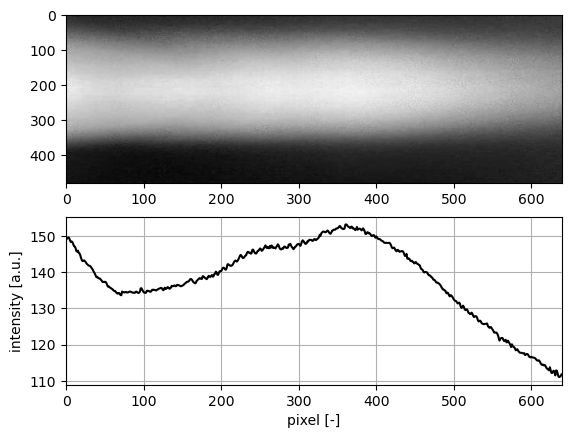

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `grayscale` is your image data (2D numpy array)
I = grayscale.sum(axis=0)  # row wise summation

# Get the intensity value at pixel 50
pixel_50_intensity = grayscale[:, 50].sum()  # summing the intensities for column 50

# Print the result
print(f"De intensiteit bij pixel 50 is: {pixel_50_intensity}")

plt.subplot(2, 1, 1)
plt.imshow(grayscale, cmap=plt.cm.gray, aspect="auto")
xmin, xmax = plt.xlim()  # grab min max values from imshow

plt.subplot(2, 1, 2)
plt.plot(I, c='black')

plt.xlim(xmin, xmax)  # set min max values

plt.grid()
plt.xlabel(r"pixel [-]")
plt.ylabel(r"intensity [a.u.]")
plt.show()


# Intensiteit per frame
Het zal voorkomen dat we geinteresseerd zijn in de relatieve intensiteit van het algehele camera beeld. Dit is op verschillende manieren te bepalen. Men kan de pixel intensiteit van het gehele frame bij elkaar optellen. Daar zou je nog de achtergrond ruis (`shot noise`) vanaf kunnen halen. Echter, als dat overal aanwezig is dan is dit voor het simpelste doeleinde van het spectroscoop practicum niet relevant. We bekijken toch slechts relatieve informatie.

Fit kon niet uitgevoerd worden bij piek 15
Fit kon niet uitgevoerd worden bij piek 21
Fit kon niet uitgevoerd worden bij piek 40
Fit kon niet uitgevoerd worden bij piek 48
Fit kon niet uitgevoerd worden bij piek 56
Fit kon niet uitgevoerd worden bij piek 63
Fit kon niet uitgevoerd worden bij piek 65
Fit kon niet uitgevoerd worden bij piek 69
Fit kon niet uitgevoerd worden bij piek 72
Fit kon niet uitgevoerd worden bij piek 83
Fit kon niet uitgevoerd worden bij piek 90
Fit kon niet uitgevoerd worden bij piek 104
Fit kon niet uitgevoerd worden bij piek 123
Fit kon niet uitgevoerd worden bij piek 127
Fit kon niet uitgevoerd worden bij piek 132
Fit kon niet uitgevoerd worden bij piek 144
Fit kon niet uitgevoerd worden bij piek 154
Fit kon niet uitgevoerd worden bij piek 168
Fit kon niet uitgevoerd worden bij piek 173
Fit kon niet uitgevoerd worden bij piek 177
Fit kon niet uitgevoerd worden bij piek 187
Fit kon niet uitgevoerd worden bij piek 193
Fit kon niet uitgevoerd worden bij piek 195

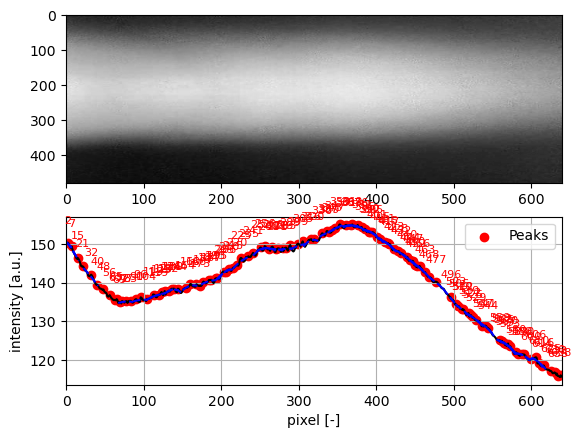

In [9]:
import numpy as np
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Gaussische functie
def gaussian(x, a, mu, sigma):
    return a * np.exp(-((x - mu)**2) / (2 * sigma**2))

# Piekdetectie
peaks, _ = find_peaks(I, height=0)  # Detecteer pieken boven een bepaalde drempel (height)

# Plotten
plt.subplot(2, 1, 1)
plt.imshow(grayscale, cmap=plt.cm.gray, aspect="auto")
xmin, xmax = plt.xlim()

plt.subplot(2, 1, 2)
plt.plot(I, c='black')
plt.scatter(peaks, I[peaks], color='red', label="Peaks")  # Markeer pieken
plt.xlim(xmin, xmax)
plt.grid()
plt.xlabel(r"pixel [-]")
plt.ylabel(r"intensity [a.u.]")

# Gaussische fits
for peak in peaks:
    # Selecteer een smalle regio rond de piek
    start = max(0, peak - 10)
    end = min(len(I), peak + 10)
    x_data = np.arange(start, end)
    y_data = I[start:end]

    # Pas de Gaussische functie aan
    try:
        popt, _ = curve_fit(gaussian, x_data, y_data, p0=[I[peak], peak, 3])
        fitted_curve = gaussian(x_data, *popt)
        plt.plot(x_data, fitted_curve, color='blue', linestyle='--')  # Plot de Gaussische fit
    except RuntimeError:
        print(f"Fit kon niet uitgevoerd worden bij piek {peak}")

# Annoteren van pieken
for peak in peaks:
    plt.text(peak, I[peak] + 5, f'{peak}', color='red', fontsize=8, ha='center')

plt.legend()
plt.show()


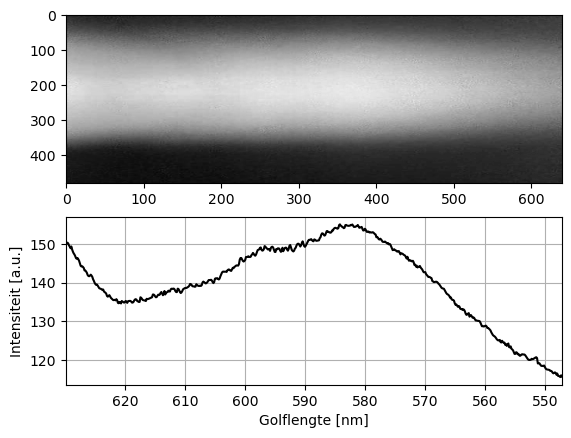

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Stel dat 'grayscale' je 2D array is van de beelddata
# Bijvoorbeeld een random array als placeholder:
# grayscale = np.random.rand(100, 500)  # Dit is slechts een voorbeeld

# Som over de rijen om de intensiteit per pixel (kolom) te verkrijgen
I = grayscale.sum(axis=0)

# De fitfunctie om pixels naar golflengte om te rekenen
def pixel_to_wavelength(x):
    return -0.1295* x + 629.92

# Verkrijg het aantal pixels (aantal kolommen in je 'grayscale' array)
pixels = np.arange(grayscale.shape[1])

# Zet de pixelwaarden om naar golflengtes
golflengtes = pixel_to_wavelength(pixels)

# Plot de afbeelding in het eerste subplot
plt.subplot(2, 1, 1)
plt.imshow(grayscale, cmap=plt.cm.gray, aspect="auto")
xmin, xmax = plt.xlim()  # grab min max values from imshow

# Plot de intensiteit vs. golflengte in het tweede subplot
plt.subplot(2, 1, 2)
plt.plot(golflengtes, I, c='black')  # Gebruik golflengte op de x-as

plt.xlim(golflengtes[0], golflengtes[-1])  # Zet de limieten van de x-as op basis van de golflengtes
plt.grid()
plt.xlabel(r"Golflengte [nm]")  # X-as is nu golflengte
plt.ylabel(r"Intensiteit [a.u.]")
plt.show()


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.optimize import curve_fit

# Laad de afbeelding
image_path = "/mnt/data/image.png"  # Dit is jouw afbeelding
image = Image.open(image_path)

# Converteer naar grayscale
grayscale = np.array(image.convert('L'))  # 'L' voor grayscale

# Bereken intensiteit per kolom door som over de rijen
I = grayscale.sum(axis=0)

# Functie om pixels naar golflengte om te rekenen (gebruik jouw parameters)
def pixel_to_wavelength(x):
    return -0.1295 * x + 629.92

# Verkrijg pixel indices
pixels = np.arange(grayscale.shape[1])

# Zet de pixels om naar golflengtes
golflengtes = pixel_to_wavelength(pixels)

# Functie voor Gaussian fit
def gaussian(x, a, x0, sigma, c):
    return a * np.exp(-((x - x0)**2) / (2 * sigma**2)) + c

# Maak een initiele schatting van de fitparameters
init_guess = [np.max(I), golflengtes[np.argmax(I)], 10, np.min(I)]

# Pas de Gaussian fit toe
params, _ = curve_fit(gaussian, golflengtes, I, p0=init_guess)

# Bereken de fitcurve
fit_curve = gaussian(golflengtes, *params)

# Achtergrondverwijdering
I_cleaned = I - fit_curve

# Visualiseer resultaten
plt.figure(figsize=(10, 8))

# Originele afbeelding
plt.subplot(3, 1, 1)
plt.imshow(grayscale, cmap='gray', aspect='auto')
plt.title("Originele Grayscale Afbeelding")
plt.xlabel("Pixel")
plt.ylabel("Rij")

# Intensiteit met Gaussian fit
plt.subplot(3, 1, 2)
plt.plot(golflengtes, I, label="Originele Intensiteit", color="black")
plt.plot(golflengtes, fit_curve, label="Gaussian Fit", color="red", linestyle="--")
plt.title("Gaussian Fit over Intensiteit")
plt.xlabel("Golflengte [nm]")
plt.ylabel("Intensiteit [a.u.]")
plt.legend()
plt.grid()

# Gereduceerde intensiteit
plt.subplot(3, 1, 3)
plt.plot(golflengtes, I_cleaned, label="Achtergrondvrije Intensiteit", color="blue")
plt.title("Intensiteit na Achtergrondverwijdering")
plt.xlabel("Golflengte [nm]")
plt.ylabel("Intensiteit [a.u.]")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/image.png'

## Intensiteit van één frame

In [197]:
image_path = "C:\\Users\\pepij\\OneDrive\\Afbeeldingen\\read"


from PIL import Image

try:
    image = Image.open(image_path)
    print("Afbeelding succesvol geladen!")
except FileNotFoundError:
    print(f"Bestand niet gevonden: {image_path}")


PermissionError: [Errno 13] Permission denied: 'C:\\Users\\pepij\\OneDrive\\Afbeeldingen\\read'

In [6]:
I_frame = grayscale.sum() # sommatie van één frame
I_frame

73759.6024968627

## Video opname

In [7]:
cam = cv2.VideoCapture(0)

video = []

i=0
while i<100: # Maak een opname van 100 frames
    i+=1
    check, frame = cam.read()
    video.append(frame) # Python arrays zijn langzaam, maar dit is in ieder geval duidelijk

video = np.array(video)
video = skimage.color.rgb2gray(video) # RGB -> grayscale


cam.release()
cv2.destroyAllWindows()

## Bekijk de opname

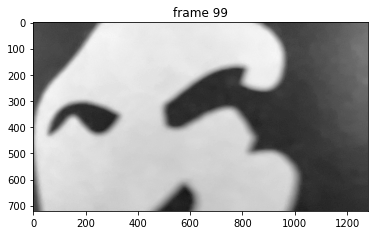

In [8]:
from IPython import display

fig = plt.figure()

imgs = []
for i,frame in enumerate(video):
    display.clear_output(wait=True)
    plt.title(r"frame %s" % i)
    plt.imshow(frame, cmap=plt.cm.gray)
    plt.show()

# Totale intensiteit per frame

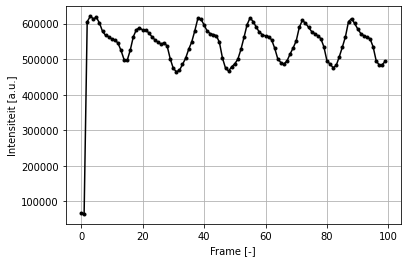

In [9]:
intensities = []
for frame in video:
    intensities.append(frame.sum())
    
plt.plot(intensities, '.-', color='black')
plt.xlabel(r"Frame [-]")
plt.ylabel(r"Intensiteit [a.u.]")
plt.grid()

# Bepalen sensor responsitiveit
Door twee polarisatie filters te gebruiken (Malus's law) zouden we de responsiviteit van de camera in kaart kunnen brengen. Zo kunnen we gelijk inzicht kijken in de karaktistiek van de sensor. Mogelijk is hierdoor relatieve intensiteit zinvoller te gebruiken. Heeft de sensor hysterese? 
